In [1]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
# tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')
# tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VEOEY CWST SRCL CWY.AX TMRAY SYM GXO AUTO.OL ZBRA KGX.DE CGNX DAIUF MANH BKW.SW ENLAY NEE IBDRY DNNGY FSLR ENR.DE')
tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VIE.PA CWST CWY.AX TOM.OL SYM GXO AUTO.OL ZBRA KGX.DE CGNX MANH BKW.SW ENEL.MI NEE IBE.MC ORSTED.CO FSLR ENR.DE')

In [3]:
# df = tickers.download(period="1y")
df = tickers.download(start="2024-01-01", end="2025-01-01", interval="1d")

[*********************100%***********************]  26 of 26 completed


In [4]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/ticker_download_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)

In [5]:
# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:

    # Print ticker for debugging
    print(f"Processing {ticker}...")

    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    try:
        info = t.info
        # print(f"Sucessful fetching info for {ticker}: {info}")
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        continue
    
    # hist = t.history(period="2y")
    hist = t.history(start = '2024-01-01', end = '2024-12-31')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

Processing ECL...
Processing BMI...
Processing VLTO...
Processing XYL...
Processing GF.SW...
Processing WM...
Processing GFL...
Processing CLH...
Processing VIE.PA...
Processing CWST...
Processing CWY.AX...
Processing TOM.OL...
Processing SYM...
Processing GXO...
Processing AUTO.OL...
Processing ZBRA...
Processing KGX.DE...
Processing CGNX...
Processing MANH...
Processing BKW.SW...
Processing ENEL.MI...
Processing NEE...
Processing IBE.MC...
Processing ORSTED.CO...
Processing FSLR...
Processing ENR.DE...


In [6]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$70.77B,1.09M,19.48,N/A,19.482814
1,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.59B,0.18M,37.87,N/A,37.865355
2,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$23.82B,1.51M,26.25,N/A,26.252681
3,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$29.03B,1.24M,3.43,N/A,3.425050
4,GF.SW,GEORG FISCHER N,Georg Fischer AG engages in the provision of p...,$5.42B,0.16M,17.18,N/A,17.177645
5,WM,"Waste Management, Inc.","Waste Management, Inc., through its subsidiari...",$91.65B,1.62M,14.23,N/A,14.231277
6,GFL,GFL Environmental Inc. Subordin,GFL Environmental Inc. provides non-hazardous ...,$17.97B,1.2M,31.30,N/A,31.296606
7,CLH,"Clean Harbors, Inc.","Clean Harbors, Inc. provides environmental and...",$10.62B,0.3M,34.88,N/A,34.880453
8,VIE.PA,VEOLIA ENVIRON.,Veolia Environnement SA designs and provides w...,$23.48B,1.73M,-1.38,N/A,-1.383950
9,CWST,"Casella Waste Systems, Inc.","Casella Waste Systems, Inc., together with its...",$7.01B,0.31M,24.49,N/A,24.492203


In [7]:
# Display the data
df

Price           Close                                                 \
Ticker        AUTO.OL      BKW.SW         BMI       CGNX         CLH   
Date                                                                   
2024-01-02  19.305000         NaN  155.151260  39.945366  170.639999   
2024-01-03  17.705000  143.791931  150.915085  38.638275  162.059998   
2024-01-04  16.850000  145.645432  152.056000  37.826298  165.649994   
2024-01-05  16.750000  147.596481  147.938858  37.479721  164.699997   
2024-01-08  17.665001  149.157303  152.065887  38.093655  167.229996   
...               ...         ...         ...        ...         ...   
2024-12-24        NaN         NaN  219.640457  36.601562  230.940002   
2024-12-26        NaN         NaN  219.590530  36.850960  231.330002   
2024-12-27  11.360000  151.699997  215.097885  35.953133  229.570007   
2024-12-30  11.110000  150.199997  213.899857  35.584023  230.160004   
2024-12-31        NaN         NaN  211.773331  35.773567  230.139999   

Price                                                              ...  \
Ticker            CWST    CWY.AX         ECL   ENEL.MI     ENR.DE  ...   
Date                                                               ...   
2024-01-02   84.680000  2.612585  195.772766  6.096715  11.885000  ...   
2024-01-03   81.900002  2.564024  193.718231  6.021290  11.125000  ...   
2024-01-04   81.139999  2.564024  193.095963  6.110346  11.400000  ...   
2024-01-05   81.029999  2.573736  192.858902  6.080358  11.525000  ...   
2024-01-08   83.180000  2.573736  193.579971  6.096715  12.130000  ...   
...                ...       ...         ...       ...        ...  ...   
2024-12-24  106.239998  2.650687  240.118759       NaN        NaN  ...   
2024-12-26  107.550003       NaN  238.742310       NaN        NaN  ...   
2024-12-27  106.160004  2.660578  237.146439  6.641284  50.080002  ...   
2024-12-30  105.419998  2.650687  233.914810  6.679112  50.080002  ...   
2024-12-31  105.809998  2.621016  233.715332       NaN        NaN  ...   

Price         Volume                                                        \
Ticker          MANH         NEE ORSTED.CO        SYM    TOM.OL     VIE.PA   
Date                                                                         
2024-01-02  377600.0  10064300.0  625302.0   876200.0  462619.0  1094043.0   
2024-01-03  403300.0  10306300.0  720721.0  1350100.0  839065.0  1685043.0   
2024-01-04  376800.0  10568100.0  879598.0  1259700.0  704957.0  1544192.0   
2024-01-05  627500.0   7803800.0  835454.0  1889600.0  562973.0  1399007.0   
2024-01-08  302300.0   7766600.0  736974.0  1115700.0  607224.0   882019.0   
...              ...         ...       ...        ...       ...        ...   
2024-12-24  130300.0   3001800.0       NaN   836000.0       NaN   483988.0   
2024-12-26  276200.0   4503800.0       NaN   805000.0       NaN        NaN   
2024-12-27  482700.0   5458100.0  371815.0  1047100.0  169342.0   988218.0   
2024-12-30  199600.0   8399000.0  416919.0  1165200.0  153435.0   784850.0   
2024-12-31  330900.0   6216500.0       NaN   920100.0       NaN   764730.0   

Price                                                  
Ticker           VLTO         WM        XYL      ZBRA  
Date                                                   
2024-01-02  1129600.0  1299000.0  1089400.0  452900.0  
2024-01-03  1198300.0  1826100.0  1182800.0  404800.0  
2024-01-04  1388500.0  1376400.0  1352600.0  358100.0  
2024-01-05  1899300.0  1415600.0  1144300.0  293500.0  
2024-01-08  1555800.0  1536400.0   904300.0  399500.0  
...               ...        ...        ...       ...  
2024-12-24   277500.0   711500.0   379300.0   88700.0  
2024-12-26   580100.0   736700.0   575700.0  140100.0  
2024-12-27   608800.0   878700.0   552400.0  287200.0  
2024-12-30   528600.0  1209700.0   586800.0  211300.0  
2024-12-31   644000.0  1549000.0   641600.0  327900.0  

[259 rows x 182 columns]

In [8]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/data_close_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df['Close'].to_csv(filename, index=False)

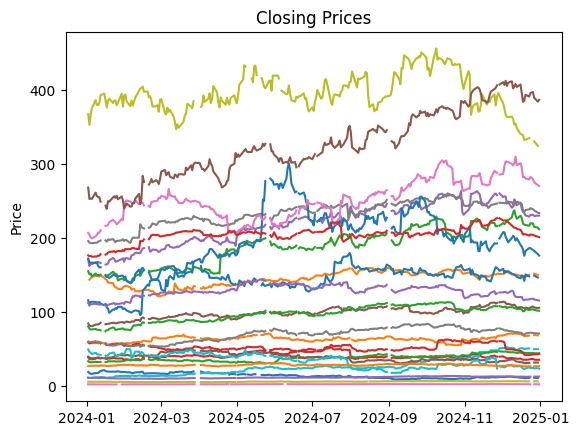

In [9]:
# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

In [10]:
df_normalized_closed = df['Close'] - df['Close'].iloc[0]
df_normalized_closed

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03,-1.600000,NaN,-4.236176,-1.307091,-8.580002,-2.779999,-0.048561,-2.054535,-0.075426,-0.760000,...,-2.330002,0.404785,-14.500000,-3.209999,-7.153366,-0.124582,-2.958672,-1.060806,-2.080521,-15.460007
2024-01-04,-2.455000,NaN,-3.095261,-2.119068,-4.990005,-3.540001,-0.048561,-2.676804,0.013630,-0.485001,...,-6.199997,0.221668,-1.299988,-4.529999,-2.269348,0.421667,-4.393181,-0.805420,-1.321266,-15.010010
2024-01-05,-2.555000,NaN,-7.212402,-2.465645,-5.940002,-3.650002,-0.038849,-2.913864,-0.016358,-0.360001,...,-7.400009,0.491524,8.000000,-6.299999,-1.924004,0.431252,-4.104286,-1.807281,-1.498756,-15.290009
2024-01-08,-1.639999,NaN,-3.085373,-1.851711,-3.410004,-1.500000,-0.038849,-2.192795,0.000000,0.245000,...,-4.520004,1.301086,19.000000,-4.480000,-2.269348,0.488750,-3.496613,-1.345642,-0.808540,-6.890015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,NaN,NaN,64.489197,-3.343803,60.300003,21.559998,0.038102,44.345993,NaN,NaN,...,75.499985,12.975246,NaN,-25.139999,NaN,-0.416666,22.667252,28.204758,5.703079,127.459991
2024-12-26,NaN,NaN,64.439270,-3.094406,60.690002,22.870003,NaN,42.969543,NaN,NaN,...,72.529984,12.439655,NaN,-24.869999,NaN,NaN,23.046844,27.846085,6.022087,128.869995
2024-12-27,-7.945001,NaN,59.946625,-3.992233,58.930008,21.480003,0.047993,41.373672,0.544569,38.195002,...,68.419998,12.181782,-36.700012,-25.609999,33.266129,-0.276665,22.297653,26.849792,5.084991,121.089996


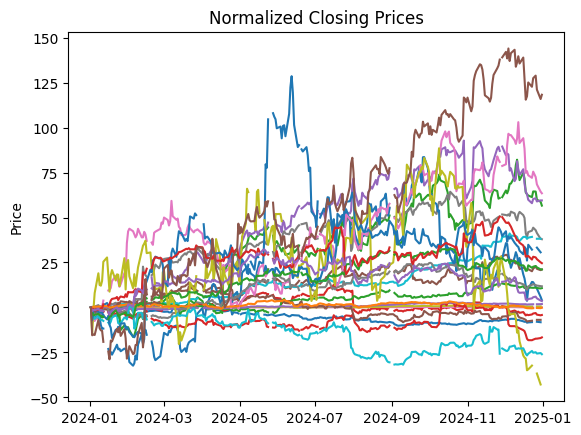

In [11]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
# plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [12]:
# Add a new column to the DataFrame with daily differences
df_diff = df['Close'].diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-0.855000,1.853500,1.140915,-0.811977,3.589996,-0.760002,0.000000,-0.622269,0.089056,0.275000,...,-3.869995,-0.183117,13.200012,-1.320000,4.884018,0.546249,-1.434509,0.255386,0.759254,0.449997
2024-01-05,-0.100000,1.951050,-4.117142,-0.346577,-0.949997,-0.110001,0.009712,-0.237061,-0.029988,0.125000,...,-1.200012,0.269855,9.299988,-1.770000,0.345345,0.009584,0.288895,-1.001862,-0.177490,-0.279999
2024-01-08,0.915001,1.560822,4.127029,0.613934,2.529999,2.150002,0.000000,0.721069,0.016358,0.605000,...,2.880005,0.809563,11.000000,1.820000,-0.345345,0.057499,0.607674,0.461639,0.690216,8.399994
2024-01-09,0.049999,0.292664,-2.906769,0.376282,-0.589996,0.239998,-0.009712,-0.049393,-0.009088,-0.115000,...,1.759995,-0.877029,-6.500000,-2.110001,-0.690666,0.076666,-0.767067,-0.009811,-0.729660,-4.649994
2024-01-10,0.049999,-0.585312,0.982147,0.366386,1.320007,-0.139999,-0.038849,1.442123,0.034532,0.240000,...,3.080002,0.260216,-0.399994,-0.219997,0.148003,-0.105417,-0.308823,0.933090,0.128174,-1.169998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-18,0.160000,-1.000000,-7.717361,-0.957687,-4.489990,-0.550003,0.000000,-8.488022,-0.037828,0.120003,...,-13.429993,-1.735695,-0.600006,-1.560001,-1.000000,-0.260000,-2.227585,-3.556808,-3.838097,-11.529999
2024-12-19,-0.639999,-0.500000,-0.988373,0.458893,-1.449997,-0.559998,-0.059344,-2.124512,-0.111545,-1.220001,...,0.910004,-0.743874,-6.500000,-0.929998,-6.600006,-0.190001,0.099884,0.099640,-0.488480,1.899994
2024-12-20,0.150000,0.500000,-0.738800,-0.299278,-3.070007,0.580002,0.009891,2.752869,0.004850,0.700001,...,-2.279999,1.884476,0.500000,0.949999,8.800003,-0.030001,2.916855,0.298889,0.707802,7.670013


In [13]:
# Add a new column to the DataFrame with daily difference relative to the previous day
df_diff_relative = df['Close'].pct_change()
# Drop the first row (NaN)
df_diff_relative = df_diff_relative.dropna()
df_diff_relative


C:\Users\Admin\AppData\Local\Temp\ipykernel_7384\2304432040.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_diff_relative = df['Close'].pct_change()


Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-0.048291,0.012890,0.007560,-0.021015,0.022152,-0.009280,0.000000,-0.003212,0.014790,0.024719,...,-0.018930,-0.003065,0.037447,-0.028399,0.044898,0.020163,-0.018450,0.001456,0.006902,0.001782
2024-01-05,-0.005935,0.013396,-0.027076,-0.009162,-0.005735,-0.001356,0.003788,-0.001228,-0.004908,0.010965,...,-0.005983,0.004531,0.025431,-0.039194,0.003038,0.000347,0.003785,-0.005705,-0.001602,-0.001107
2024-01-08,0.054627,0.010575,0.027897,0.016380,0.015361,0.026533,0.000000,0.003739,0.002690,0.052495,...,0.014446,0.013531,0.029333,0.041945,-0.003029,0.002080,0.007932,0.002644,0.006242,0.033242
2024-01-09,0.002830,0.001962,-0.019115,0.009878,-0.003528,0.002885,-0.003773,-0.000255,-0.001491,-0.009481,...,0.008702,-0.014463,-0.016839,-0.046671,-0.006076,0.002767,-0.009934,-0.000056,-0.006557,-0.017810
2024-01-10,0.002822,-0.003916,0.006585,0.009524,0.007921,-0.001678,-0.015152,0.007452,0.005673,0.019975,...,0.015097,0.004354,-0.001054,-0.005104,0.001310,-0.003794,-0.004040,0.005330,0.001159,-0.004562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.000000,0.000000,0.014433,0.014938,0.010192,0.013644,-0.011070,0.006901,0.000000,0.000000,...,0.012374,0.005794,0.000000,-0.038386,0.000000,0.002619,0.005831,0.007753,0.005446,0.012262
2024-12-26,0.000000,0.000000,-0.000227,0.006814,0.001689,0.012331,0.000000,-0.005732,0.000000,0.000000,...,-0.010522,-0.007406,0.000000,0.010998,0.000000,0.000000,0.003672,-0.001753,0.002708,0.003566
2024-12-27,0.017921,0.008644,-0.020459,-0.024364,-0.007608,-0.012924,0.003731,-0.006684,0.007060,-0.020344,...,-0.014715,-0.003593,-0.013146,-0.029815,0.007427,0.005224,-0.007221,-0.004878,-0.007935,-0.019604


In [14]:
# Add a new column 'Volatility' to DataFrame df_mini
# Calculate the volatility of each stock in the past year based on normalized closing prices
df_mini = pd.DataFrame()

df_mini['Volatility'] = df_diff_relative.std()

df_mini

,Volatility
Ticker,
AUTO.OL,0.033871
BKW.SW,0.012719
BMI,0.019239
CGNX,0.022797
CLH,0.016930
CWST,0.013523
CWY.AX,0.017005
ECL,0.011809
ENEL.MI,0.010119


In [15]:
# Calculate final weighting based on volatility 
df_mini['Inverse Volatility'] = 1 / df_mini['Volatility']
sum_inverse_volatility = df_mini['Inverse Volatility'].sum()
df_mini['Volatility Weighting'] = df_mini['Inverse Volatility'] / sum_inverse_volatility
df_mini['Volatility Weighting (%)'] = (df_mini['Volatility Weighting'] * 100).round(2)
df_mini


,Volatility,Inverse Volatility,Volatility Weighting,Volatility Weighting (%)
Ticker,,,,
AUTO.OL,0.033871,29.523478,0.019094,1.91
BKW.SW,0.012719,78.620907,0.050846,5.08
BMI,0.019239,51.976848,0.033615,3.36
CGNX,0.022797,43.864585,0.028368,2.84
CLH,0.016930,59.067709,0.038201,3.82
CWST,0.013523,73.946948,0.047824,4.78
CWY.AX,0.017005,58.805378,0.038031,3.80
ECL,0.011809,84.683800,0.054767,5.48
ENEL.MI,0.010119,98.819867,0.063910,6.39


In [16]:
# Print number of stocks:
print(f"Number of stocks: {len(df_mini)}")

Number of stocks: 26


In [25]:
# Print name of stock with lowest and highest volatility
print(f"Lowest weighting (%): {df_mini['Volatility Weighting (%)'].idxmin()} ({df_mini['Volatility Weighting (%)'].min()})")
print(f"Highest weighting (%): {df_mini['Volatility Weighting (%)'].idxmax()} ({df_mini['Volatility Weighting (%)'].max()})")

Lowest weighting (%): SYM (1.18)
Highest weighting (%): IBE.MC (6.69)


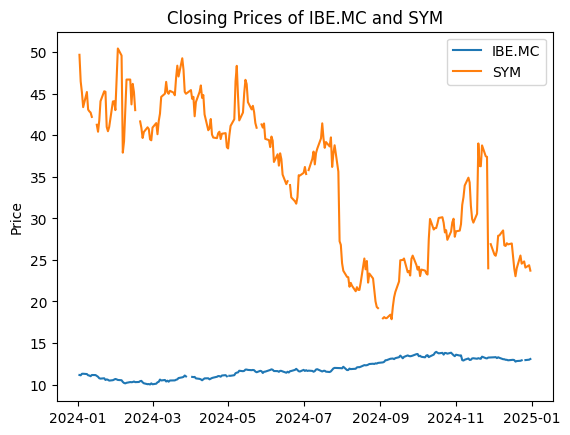

In [26]:
# Plot closing price of CWY.AX and ENLAY
plt.plot(df['Close']['IBE.MC'], label='IBE.MC')
plt.plot(df['Close']['SYM'], label='SYM')
plt.legend()
plt.title('Closing Prices of IBE.MC and SYM')
plt.ylabel('Price')
plt.show()

In [27]:
# Calculate sum of final weighting to verify correctness
sum_final_weighting = df_mini['Volatility Weighting'].sum()
sum_final_weighting

np.float64(1.0)